# Import Data

In [83]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9c69e53f6bf24045a870b6ce82b683ec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8TFJ2E4o2q72jqru2421UKRyvS_JNFqM0ICwVmI8C08G',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9c69e53f6bf24045a870b6ce82b683ec.get_object(Bucket='newwind-donotdelete-pr-0dk3fsjy2zdd3m',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body,encoding='unicode_escape',sep='\t')
df.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

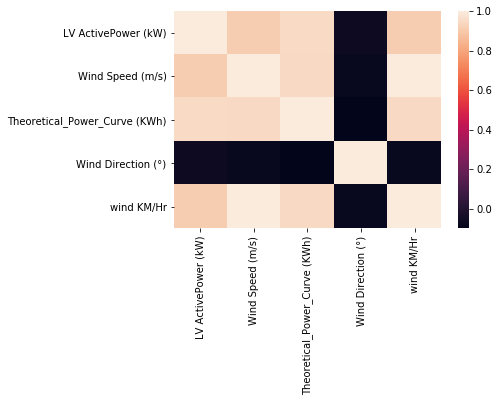

In [85]:
sns.heatmap(dfs.corr())

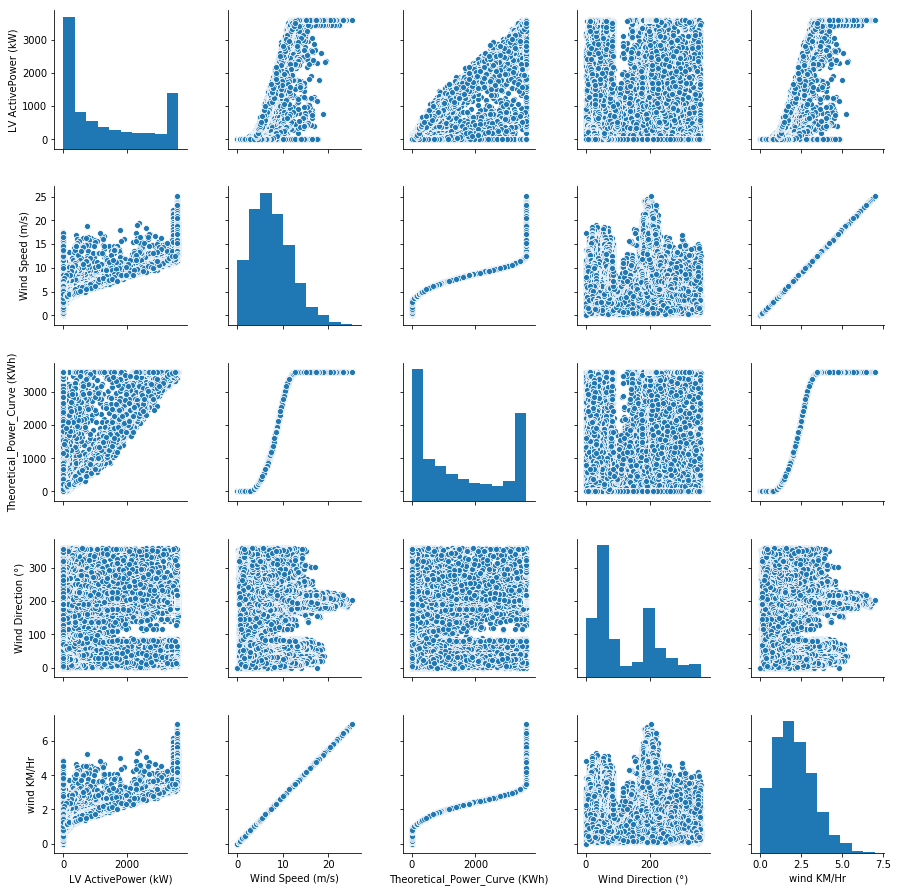

In [86]:
sns.pairplot(dfs)

# Graph between Theoretical_Power_Curve (KWh) And  "LV ActivePower (kW)

(50530,)
(50530, 1)


Text(0, 0.5, 'LV ActivePower (kW)')

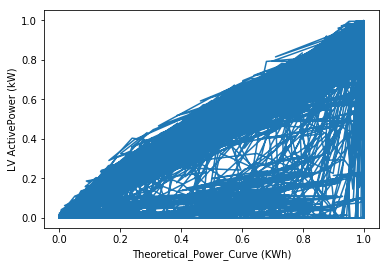

In [87]:
print(x[:,1].shape)
print(y.shape)
plt.plot(x[:,1],y)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("LV ActivePower (kW)")


# Graph between "Wind Direction (°)"  And  "LV ActivePower (kW)"

Text(0, 0.5, 'LV ActivePower (kW)')

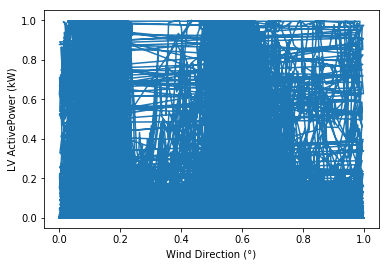

In [88]:
# Graph between "Wind Direction (°)"  And  "LV ActivePower (kW)"
plt.plot(x[:,2],y)
plt.xlabel("Wind Direction (°)")
plt.ylabel("LV ActivePower (kW)")

# Graph between "Wind Direction (°)"  And  "LV ActivePower (kW)"

Text(0, 0.5, 'LV ActivePower (kW)')

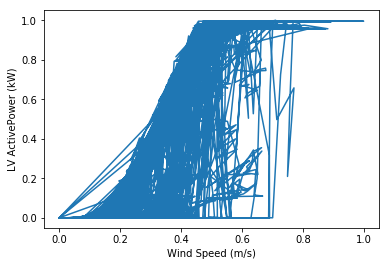

In [89]:
plt.plot(x[:,0],y)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")

In [90]:
from datetime import datetime
datetime.strptime("2012-may-31 19:00", "%Y-%b-%d %H:%M")
datetime.strptime("01 01 2018 00:00", "%d %m %Y %H:%M")

datetime.datetime(2018, 1, 1, 0, 0)

In [91]:
mydate = df.iloc[:,0].values
mynewdate = [None] * 50530
#print(mynewdate.shape)
for i in range(50530):
    mynewdate[i] = datetime.strptime(mydate[i],"%d %m %Y %H:%M")

In [92]:
mynewdate = [None] * 50530
#print(mynewdate.shape)
for i in range(50530):
    mynewdate[i] = datetime.strptime(mydate[i],"%d %m %Y %H:%M")

In [93]:

import numpy as np
new_x = np.array([mynewdate])
new_x.shape
new_x = new_x.reshape((50530,))
new_x.shape

(50530,)

## Let's plot the Graph of LV Active Power with respect to time

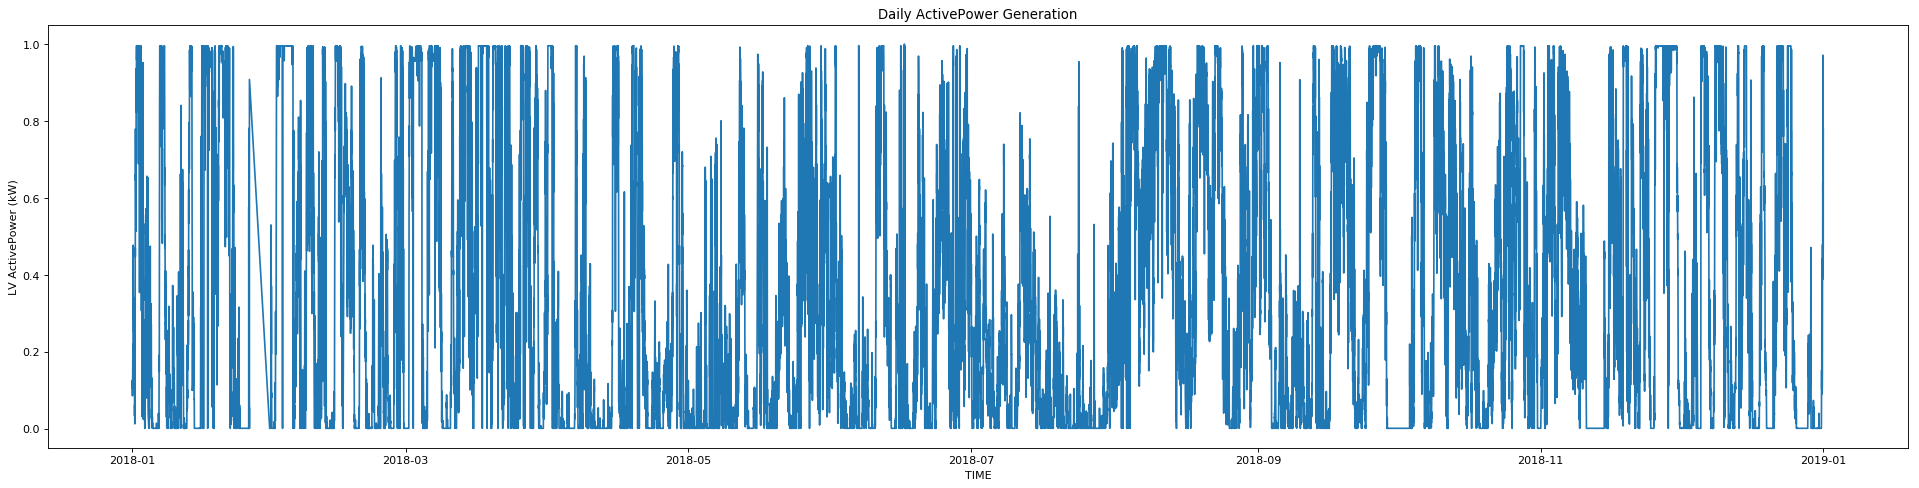

In [94]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(new_x,y)
plt.xlabel("TIME")
plt.ylabel("LV ActivePower (kW)")
plt.title("Daily ActivePower Generation")
plt.show()

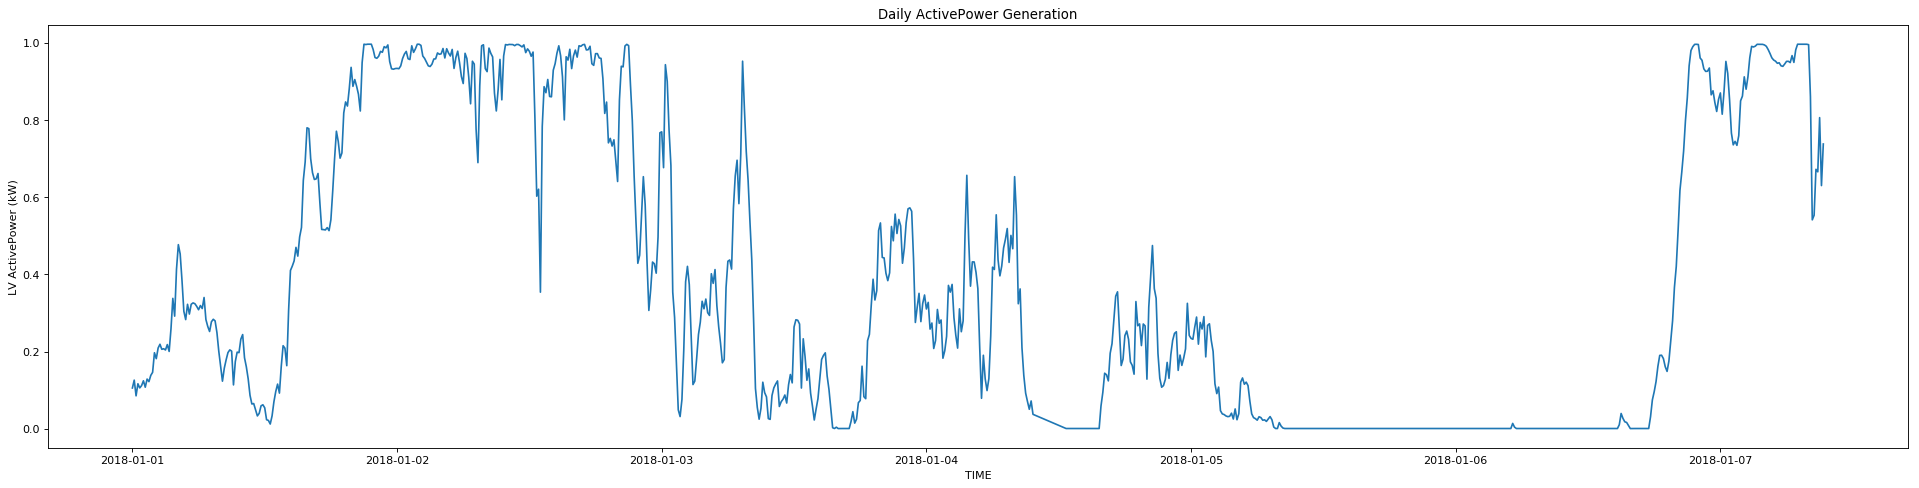

In [95]:
newx= new_x[0:900]
newy = y[0:900]
# Let's plot the Time Graph of First week of the year and see the active power is this week.
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 7), dpi=80, facecolor='w', edgecolor='r')
plt.plot(newx,newy)
plt.xlabel("TIME")
plt.ylabel("LV ActivePower (kW)")
plt.title("Daily ActivePower Generation")
plt.show()

# Feature Selection

In [96]:
# Create New Feature
x1 = x[:,0] * 5/18
x1.shape
# (50530,)
dfs['wind KM/Hr'] = x1
dfs.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),wind KM/Hr
0,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904,0.058533
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,0.062509
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,0.057482
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087,0.062371
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,0.061471


# Correlation

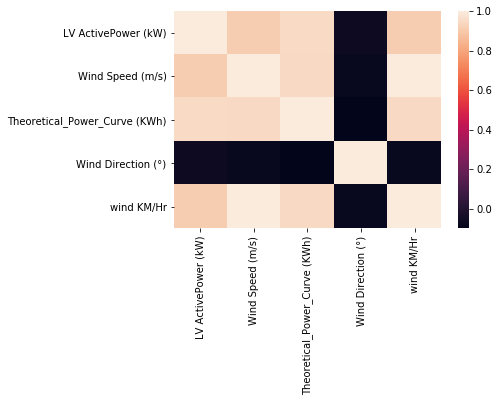

In [97]:
import seaborn as sns
sns.heatmap(dfs.corr())

In [98]:
dfs.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),wind KM/Hr
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702,0.912774
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188,1.000000
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076,0.944209
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000,-0.077188
wind KM/Hr,0.912774,1.000000,0.944209,-0.077188,1.000000


### As new feature is not correlated with target feature. So I remove the new feature.

# Data Preprocessing

In [99]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 6 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
wind KM/Hr                       50530 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.3+ MB


## As the data is not categorical or ordinal  we doesn't need to feature encoding 
## next thing is we see information of data using data.info(), there is no NULL value present in the dataset
## So the next step is split the data in  train and test

In [136]:
x= df.iloc[:,2:5].values
y=df.iloc[:,1].values
dfs = df

# Feature Scaling 

In [101]:
# As we can see from above graph data is not narmalized, So we will use MinMaxScaler to scale the Data
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
from sklearn.preprocessing import MinMaxScaler
scale1= MinMaxScaler()
scale2 = MinMaxScaler()
x= scale1.fit_transform(x)
y= y.reshape(-1,1)
y=scale2.fit_transform(y)

In [137]:
y

array([ 380.0477905,  453.7691956,  306.3765869, ..., 2201.106934 ,
       2515.694092 , 2820.466064 ])

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)


# Import Librabries

In [104]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
import numpy as np
from sklearn import svm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
x

array([[   5.31133604,  416.3289078 ,  259.9949036 ],
       [   5.67216682,  519.9175111 ,  268.6411133 ],
       [   5.2160368 ,  390.9000158 ,  272.5647888 ],
       ...,
       [   8.43535805, 1788.284755  ,   84.74250031],
       [   9.42136574, 2418.382503  ,   84.2979126 ],
       [   9.97933197, 2779.184096  ,   82.27462006]])

In [140]:
y

array([ 380.0477905,  453.7691956,  306.3765869, ..., 2201.106934 ,
       2515.694092 , 2820.466064 ])

In [107]:
sklearn.__version__

'0.20.3'

In [108]:
xg.__version__

'0.80'

In [109]:
# Build  Pipeline

In [141]:

pipeline_lr=Pipeline([('lr_classifier',LinearRegression())])
pipeline_svm=Pipeline([('dt_classifier',svm.SVR())])
pipeline_xgb=Pipeline([('rf_classifier',xg.XGBRegressor())])

In [142]:
pipelines = [pipeline_lr, pipeline_svm, pipeline_xgb]

In [143]:

best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [144]:
pipe_dict = {0: 'Linear Regression', 1: 'SVM', 2: 'XGBoost'}

In [145]:
#Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [146]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))


Linear Regression Test Accuracy: 0.9021253354853129
SVM Test Accuracy: -0.09770720747196782
XGBoost Test Accuracy: 0.9159229759375782


In [147]:
# So as above result XGBoost Model giving the best accuracy for our Data

In [148]:
my_model=xg.XGBRegressor()

In [149]:
my_model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [150]:
y_pred = my_model.predict(x)

In [151]:
y_pred

array([ 351.19095,  427.65448,  317.2196 , ..., 1566.071  , 2070.7537 ,
       2255.9358 ], dtype=float32)

In [152]:
y_pred=y_pred.reshape(-1,1)

In [122]:
y_pred_inverse_scale = scale2.inverse_transform(y_pred)
y_pred_inverse_scale

array([[ 349.46002],
       [ 427.54254],
       [ 315.66696],
       ...,
       [1564.738  ],
       [2069.595  ],
       [2252.533  ]], dtype=float32)

In [125]:
y_test_inverse_scale

array([[3348.910889 ],
       [2647.506104 ],
       [   0.       ],
       ...,
       [3108.558105 ],
       [ 212.0778961],
       [1086.136963 ]])

In [126]:
# Building a Neural Network

In [130]:
from keras.models import Sequential
from keras.layers import Dense

In [127]:
# Let's Build an Neural Network

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=3, input_dim=3))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [131]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=10)

In [132]:
results=regressor.fit(X_train,y_train)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42950/42950 [==============================] - 2s 52us/step - loss: 0.0129 - mean_absolute_error: 0.0530 - acc: 2.3283e-05: 0s - loss: 0.0132 - mean_absolute_error: 0.0537 - acc: 2.80
Epoch 2/10
42950/42950 [==============================] - 2s 38us/step - loss: 0.0125 - mean_absolute_error: 0.0514 - acc: 2.3283e-05
Epoch 3/10
42950/42950 [==============================] - 2s 36us/step - loss: 0.0124 - mean_absolute_error: 0.0513 - acc: 2.3283e-05
Epoch 4/10
42950/42950 [==============================] - 2s 36us/step - loss: 0.0124 - mean_absolute_error: 0.0515 - acc: 2.3283e-05
Epoch 5/10
42950/42950 [==============================] - 2s 37us/step - loss: 0.0125 - mean_absolute_error: 0.0516 - acc: 2.3283e-05
Epoch 6/10
42950/42950 [==============================] - 1s 35us/step - loss: 0.0124 - mean_absolute_error: 0.0515 - acc: 2.3283e-05
Epoch 7/10
4295

In [134]:
y_pred= regressor.predict(X_test)
y_pred=y_pred.reshape(-1,1)
print(y_pred[0])
y_pred_inverse_scale = scale2.inverse_transform(y_pred)
print(y_test[0])
y_test_inverse_scale = scale2.inverse_transform(y_test)
y_test_inverse_scale[1]
# Result
y_pred_inverse_scale[1]

[0.8570186]
[0.92548832]


array([2679.2102], dtype=float32)

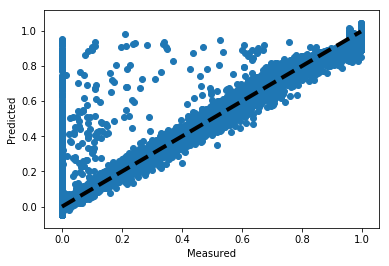

In [135]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [36]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [37]:
wml_credientials = {
  "apikey": "YcmRf3furEZvRswGtqFDQ2NoshyhwjW-Ul9--Kla-CaA",
  "iam_apikey_description": "Auto-generated for key 13f2067b-a828-461a-81ae-4fb79d03d74e",
  "iam_apikey_name": "New_Wind_Credientials_XGB",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/8c70ccdf93094ab4a01648da17c10a0f::serviceid:ServiceId-ee2aadf4-8499-463e-b1d3-168e5745caf2",
  "instance_id": "ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [38]:
client = WatsonMachineLearningAPIClient(wml_credientials)

In [39]:
metadata = {
    client.repository.ModelMetaNames.NAME : 'Wind Predication XGB',
    client.repository.ModelMetaNames.AUTHOR_NAME : 'Deepak Singh',
    client.repository.ModelMetaNames.AUTHOR_EMAIL : 'ds467625@gmail.com'
}

In [40]:
stored_data = client.repository.store_model(my_model,meta_props = metadata)

In [41]:
stored_data

{'metadata': {'guid': '77a8a195-5a5b-472c-b4c6-52dbb12878c6',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/published_models/77a8a195-5a5b-472c-b4c6-52dbb12878c6',
  'created_at': '2020-06-24T10:20:57.303Z',
  'modified_at': '2020-06-24T10:20:57.357Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/published_models/77a8a195-5a5b-472c-b4c6-52dbb12878c6/learning_configuration',
  'author': {'name': 'Deepak Singh'},
  'name': 'Wind Predication XGB',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/published_models/77a8a195-5a5b-472c-b4c6-52dbb12878c6/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/published_models/77a8a195-5a5b-472c-b4c6-52dbb12878c6/feedback',
  'latest_version':

In [42]:
guid = client.repository.get_model_uid(stored_data) 

In [43]:
guid

'77a8a195-5a5b-472c-b4c6-52dbb12878c6'

In [44]:
deploy = client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '77a8a195-5a5b-472c-b4c6-52dbb12878c6' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='49173376-dba5-4262-9486-3e68515415a8'
------------------------------------------------------------------------------------------------




In [45]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
49173376-dba5-4262-9486-3e68515415a8  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-24T10:21:03.355Z  scikit-learn-0.19  model
d174cd83-712b-4841-b406-641b6f9e3b10  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-24T10:11:07.824Z  scikit-learn-0.19  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [46]:
deploy

{'metadata': {'guid': '49173376-dba5-4262-9486-3e68515415a8',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/deployments/49173376-dba5-4262-9486-3e68515415a8',
  'created_at': '2020-06-24T10:21:03.355Z',
  'modified_at': '2020-06-24T10:21:03.629Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/deployments/49173376-dba5-4262-9486-3e68515415a8/online',
  'deployable_asset': {'name': 'Wind Predication XGB',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/published_models/77a8a195-5a5b-472c-b4c6-52dbb12878c6',
   'guid': '77a8a195-5a5b-472c-b4c6-52dbb12878c6',
   'created_at': '2020-06-24T10:21:03.330Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.19',
  

In [47]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)

In [48]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce4c95b7-0bf0-4e31-8a40-2fa03f9b7a35/deployments/49173376-dba5-4262-9486-3e68515415a8/online'